# Sesión 4

En esta sesión ya trabajaremos como data scientists. Ocuparemos una base de datos para sacar conclusiones sobre la data.

<p>
<font size='1'>Material creado por &copy; 2024 José Tomás Marquinez, todos los derechos reservados.</font>
<br>


# Tabla de contenidos

1. Dataframes y Pandas
    1. [Dataframes](#dataframes)
    2. [Pandas](#pandas)
        1. [Creación de dataframes desde cero](#creacion-de-dataframes-desde-cero)
        2. [Creación de dataframes a partir de data existente](#creacion-de-dataframes-a-partir-de-data-existente)
        3. [Describiendo dataframes](#describiendo-dataframes)
        4. [Mostrar información sobre las columnas y filas](#mostrar-informacion-sobre-las-columnas-y-filas)
        5. [Modificando la data](#modificando-la-data)
        6. [Trabajando con data](#trabajando-con-data)
        7. [Reestructurando la data](#reestructurando-la-data)
        8. [Haciendo estadística sobre el dataframe](#haciendo-estadística-sobre-el-dataframe)
        9. [Trabajando con varios dataframes](#trabajando-con-varios-dataframes)
    3. [Graficando valores](#graficando-valores)


# Dataframes y Pandas

## Dataframes

Un _**dataframe**_ (en español, marco de información) es una estructura de datos construída en base a filas y columnas, similar a lo que sería una base de datos o una planilla Excel. Consiste en un diccionario de listas, en que cada lista tiene sus propios identificadores o llaves.

## Pandas

El módulo más utilizado hoy en día para trabajar con este tipo de estructura de datos (planillas que vienen de Excel, archivos exportados desde queries de SQL en forma de CSV, archivos disponibles en algún repositorio online) es uno conocido (tiernamente) como [`pandas`](https://pandas.pydata.org/). También podemos usar `pip` para su instalación `pip install pandas`.

<style>
.custom-image {
  width: 300px;
  height: auto;

}
</style>

<center><img src="img/biblioteca_pandas.jpg" alt="image" class="custom-image"></center>





### Creación de dataframes desde cero

Para crear un _dataframe_ desde cero, primero es necesario crear el diccionario de valores asociado a esta tabla. 

In [1]:
# Un diccionario de ints:
dict1 = {'a': [4,5,6],
         'b': [7,8,9],
         'c': [10,11,12]}

#Un diccionario de valores mezclados
dict2 = {"Apellidos": ['Marquinez', 'Cataldo'],
         "Nombres": ['José Tomás', 'Alejandro'],
         "Título": ['Ing Civil Industrial TI', 'Ing Civil Industrial'],
         "Alma Mater": ['PUC', 'Universidad de Chile']}

Y ya con ese diccionario, se puede crear el _dataframe_ con que trabajaremos. Para ello, debemos importar `pandas`, entendiendo que lo que se importa es una clase `DataFrame` que permite efectivamente trabajar con _dataframes_.

In [2]:
import pandas as pd

df = pd.DataFrame(dict1)
df

,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


In [3]:
df2 = pd.DataFrame(dict2)
df2

,Apellidos,Nombres,Título,Alma Mater
0,Marquinez,José Tomás,Ing Civil Industrial TI,PUC
1,Cataldo,Alejandro,Ing Civil Industrial,Universidad de Chile


También es posible crear un dataframe a partir de listas:

In [4]:
df = pd.DataFrame(
    [[4,7,10],
     [5,8,11],
     [6,9,12]],
    index=[1,2,3],
    columns=["a","b","c"]
)
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


Notemos que en este último ejemplo, los nombres de las columnas fue necesario entregárselos aparte, además de que definimos que la numeración de las columnas (_index_) la definimos distinta.

### Creación de dataframes a partir de data existente

Podemos también importar información directamente desde archivos `*.csv` o incluso `*.xlsx` (entre otros como JSON o directamente de un repositorio).

En la carpeta `data` les dejé [dos archivos](https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows). Uno llamado `netflix_titles.xlsx` y otro llamado `netflix_credits.xlsx`.

Para crear un _dataframe_ a partir de un archivo existente, la clase `DataFrame` de _pandas_ ofrece dos métodos que pueden ser de utilidad:

- `read_csv(filename)`: Lee la data desde el `csv` entregado en `filename`. Existen [_muchos_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) parámetros por defecto que pueden ser alterados para una lectura correcta del archivo. Los más utilizados son `sep` (especifica el separador de columnas usado por el archivo), `usecols` (especifica la lista de nombres o índices de columna que queremos extraer si no queremos todas), `dtype` (permite especificar desde un diccionario qué tipo de dato corresponde a cada columna) y `nrows` (especifica la cantidad de filas a montar).
- `read_excel(filename)`: Lee la data desde el Excel entregado en `filename`. También existen [_muchos_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) parámetros por defecto que pueden ser alterados para una lectura correcta del archivo. Los más utilizados son `usecols`, `dtype`, `nrows`, `thousands` (especifica el punto para separar los millares), y `decimal` (especifica el punto en el que se separan los decimales de la parte entera).

In [5]:
df_titulos = pd.read_excel('data/netflix_titles.xlsx')

In [6]:
df_creditos = pd.read_csv('data/netflix_credits.csv')

### Describiendo dataframes

Podemos comenzar intentando analizar qué información tenemos. Por ejemplo, podemos preguntar cuántas filas tiene cada dataframe usando la función `len()`:

In [7]:
print(len(df_titulos))
print(len(df_creditos))

6137
81355


O bien podemos ver el tamaño del _dataframe_ usando `shape`

In [8]:
print(df_titulos.shape)
print(df_creditos.shape)

(6137, 15)
(81355, 5)


Podemos preguntarnos por las columnas de un _dataframe_ usando `columns`.

In [9]:
print(df_titulos.columns)
print(df_creditos.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


Podemos también estudiar cómo fueron interpretados los tipos de cada una de estas columnas con `dtypes`. `object` se refiere a un _str_:

In [10]:
df_titulos.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

Si bien `seasons` sabemos que es un número entero, pandas lo interpretó como _float_. Esto se debe a que los _DataFrames_ no admiten valores vacíos en columnas que son enteros, y como esta columna tenía valores vacíos, los interpretó como _float_.

También podemos pedirle una descripción general sobre el dataframe con `describe()`.

In [11]:
df_titulos.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,6137.000000,6137.000000,2306.000000,5669.000000,5.653000e+03,6061.000000,5885.000000
mean,2017.371843,76.381946,2.106678,6.540942,2.115029e+04,19.267196,6.633194
std,6.603620,39.086828,2.716844,1.135944,9.254225e+04,51.291407,1.251610
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2017.000000,44.000000,1.000000,5.800000,5.170000e+02,3.381000,6.000000
50%,2019.000000,80.000000,1.000000,6.600000,2.095000e+03,7.580000,6.791000
75%,2021.000000,105.000000,2.000000,7.300000,8.884000e+03,16.523000,7.400000
max,2023.000000,225.000000,44.000000,9.600000,2.684317e+06,1078.637000,10.000000


Acá, el dataframe determinó cuáles son las columnas de campos numéricos, y extrajo las principales estadísticas (recuento, promedio, desviación estándar, mínima, cuartiles y máximo) para cada uno de esos valores.

### Mostrar información sobre las columnas y filas

Podemos ya comenzar a analizar la información. Por ejemplo, veamos el contenido de una columna en particular, o más. Para ello, hacemos `df[lista_cols]`, en que `lista_cols` es una lista de las columnas que deseamos analizar. Esto retornará un _dataframe_.

In [12]:
lista_cols = ['title','release_year','runtime']

df_titulos[lista_cols]

,title,release_year,runtime
0,Five Came Back: The Reference Films,1945,51
1,Rocky,1976,119
2,Grease,1978,110
3,The Sting,1973,129
4,Rocky II,1979,119
...,...,...,...
6132,عبود في البيت,2023,81
6133,Sweetie,2023,120
6134,Sommore: Queen Chandelier,2023,69
6135,All Na Vibes,2023,80


O bien, obtener una sola columna. Para ello, hacemos `df[col]` (con `col` siendo un _str_), o `df.col` (si el nombre de la columna no contiene espacios). Esto retorna una instancia de _Pandas_ basada en la clase _Series_, es decir, es una serie de valores simplemente (y ya no un Dataframe)

In [13]:
df_titulos.release_year #df_titulos['release_year']

0       1945
1       1976
2       1978
3       1973
4       1979
        ... 
6132    2023
6133    2023
6134    2023
6135    2023
6136    2023
Name: release_year, Length: 6137, dtype: int64

Para extraer un conjunto de filas, podemos hacerlo de tres maneras:

- `df.iloc[a:b]`: Selecciona las filas de índices desde `a` hasta `b-1`.
- `df.loc[condition]`: Selecciona las filas de índices que cumplen la condición.
- `df[condition]`: Extrae (retorna) las filas que cumplen la condición.

Por ejemplo, extraigamos las filas de aquellas películas que son del año 2020.

In [14]:
df_titulos[df_titulos.release_year == 2020]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2641,ts235655,Outer Banks,SHOW,A tight-knit group of teens unearths a long-bu...,2020,TV-MA,50,"['drama', 'action', 'thriller', 'crime', 'roma...",US,3.0,tt10293938,7.6,60629.0,152.785,8.483
2644,ts89259,The Queen's Gambit,SHOW,"In a Kentucky orphanage in the 1950s, a young ...",2020,TV-MA,56,"['drama', 'sport']",US,1.0,tt10048342,8.6,473352.0,54.151,8.571
2649,ts219660,Alice in Borderland,SHOW,A group of bored delinquents are transported t...,2020,TV-MA,55,"['scifi', 'thriller', 'fantasy', 'action', 'dr...",JP,2.0,tt10795658,7.7,79262.0,217.937,8.196
2652,ts84146,Emily in Paris,SHOW,When ambitious Chicago marketing exec Emily un...,2020,TV-MA,30,"['drama', 'comedy', 'romance']",US,3.0,tt8962124,6.9,103994.0,91.588,7.851
2653,tm441050,The Gentlemen,MOVIE,American expat Mickey Pearson has built a high...,2020,R,113,"['crime', 'action', 'comedy']","GB,US",NaN,tt8367814,7.8,351270.0,50.953,7.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,tm1086569,The Blue Whale,MOVIE,A group of neglected young people who are hook...,2020,NaN,76,['thriller'],EG,NaN,NaN,NaN,NaN,NaN,NaN
4249,ts243189,Booba: Food Puzzle,SHOW,"In a cozy kitchen, in the spotlight meet every...",2020,TV-Y,3,"['animation', 'comedy', 'family']",GB,1.0,tt12319946,8.5,53.0,NaN,NaN
4250,ts314647,Patton Oswalt: I Love Everything,SHOW,Turning 50. Finding love again. Buying a house...,2020,NaN,60,[],NaN,1.0,NaN,NaN,NaN,NaN,NaN
4252,tm873357,Mariposa,MOVIE,Iqbal (Angga Yunanda) is like a Mariposa butte...,2020,NaN,117,"['comedy', 'drama', 'romance']",NaN,NaN,tt11470064,6.7,777.0,NaN,NaN


In [15]:
#Por índices
df_titulos[5:10]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'comedy']",GB,NaN,tt0071853,8.2,547292.0,20.964,7.804
6,tm17249,Animal House,MOVIE,"At a 1962 College, Dean Vernon Wormer is deter...",1978,R,109,['comedy'],US,NaN,tt0077975,7.4,123611.0,17.372,7.020
7,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",GB,4.0,tt0063929,8.8,75654.0,24.773,8.258
8,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],GB,NaN,tt0079470,8.0,405022.0,19.787,7.762
9,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,120,"['comedy', 'music', 'romance']",US,NaN,tt0047673,7.5,46586.0,11.598,7.200


In [16]:
# Si queremos más de una condición, cada condición debe ser escritas entre paréntesis, y unidas con & o |. La negación se escribe como ~.
display(df_titulos[(df_titulos.release_year == 2020) & (df_titulos.type == "SHOW") & ~(df_titulos.runtime > 30)])

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2652,ts84146,Emily in Paris,SHOW,When ambitious Chicago marketing exec Emily un...,2020,TV-MA,30,"['drama', 'comedy', 'romance']",US,3.0,tt8962124,6.9,103994.0,91.588,7.851
2656,ts359690,로보카폴리 쏭쏭뮤지엄,SHOW,NaN,2020,TV-Y,5,[],KR,1.0,NaN,NaN,NaN,0.600,NaN
2676,ts235758,Never Have I Ever,SHOW,The complicated life of a first-generation Ind...,2020,TV-14,27,"['comedy', 'drama', 'reality']",US,4.0,tt10062292,7.8,61971.0,48.855,8.165
2700,ts103133,I Am Not Okay with This,SHOW,Sydney is a teenage girl navigating the trials...,2020,TV-MA,21,"['fantasy', 'scifi', 'comedy', 'drama']",US,1.0,tt9446688,7.5,65650.0,18.598,8.164
2701,ts237104,History 101,SHOW,Infographics and archival footage deliver bite...,2020,TV-14,22,"['documentation', 'history']",GB,2.0,tt11958648,6.8,4580.0,14.881,7.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,ts304136,마법버스 타요,SHOW,NaN,2020,TV-Y7,17,[],KR,1.0,NaN,NaN,NaN,0.620,NaN
4234,ts255867,뽀로로 동화나라,SHOW,NaN,2020,TV-Y,14,['animation'],KR,1.0,NaN,NaN,NaN,0.612,NaN
4240,ts262037,Bread Barbershop,SHOW,"In a town filled with food, Bread is a master ...",2020,TV-Y,12,"['comedy', 'fantasy', 'animation']",KR,3.0,tt12912830,7.1,172.0,NaN,NaN
4249,ts243189,Booba: Food Puzzle,SHOW,"In a cozy kitchen, in the spotlight meet every...",2020,TV-Y,3,"['animation', 'comedy', 'family']",GB,1.0,tt12319946,8.5,53.0,NaN,NaN


O mostrar las filas que no tienen valores vacíos para una columna particular:

In [17]:
df_titulos[df_titulos.imdb_score.notnull()]
df_titulos[~df_titulos.imdb_score.isnull()]  # es lo mismo
# lo contrario sería .isnull()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,75.699,7.246
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'comedy']",GB,NaN,tt0071853,8.2,547292.0,20.964,7.804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,tm1299701,Dr Jason Leong: Ride with Caution,MOVIE,"The comic shares his diagnoses on ageing, the ...",2023,NaN,65,['comedy'],MY,NaN,tt26340263,5.9,102.0,5.379,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],TR,NaN,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],US,NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1.357,4.000


Si queremos mostrar más de un _dataframe_ por celda, sugiero utilizar la función `display()` más que `print()`, dado que esta última convierte a _str_ antes de mostrarlo. Usémoslo para determinar más muestras del dataframe:

In [18]:
display(df_titulos.head(5))
display(df_titulos.tail(7))
display(df_titulos.sample(3))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,75.699,7.246


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
6130,tm1299701,Dr Jason Leong: Ride with Caution,MOVIE,"The comic shares his diagnoses on ageing, the ...",2023,NaN,65,['comedy'],MY,NaN,tt26340263,5.9,102.0,5.379,2.0
6131,tm1315251,Do Your Worst,MOVIE,Regret and redemption take center stage as Son...,2023,NaN,91,"['drama', 'romance', 'comedy']",ZA,NaN,tt27032785,NaN,NaN,3.842,NaN
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",KW,NaN,NaN,NaN,NaN,3.351,2.0
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],TR,NaN,tt26349328,7.9,209.0,2.450,7.2
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],US,NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1.357,4.0
6136,tm561709,Going to Heaven,MOVIE,"A story about young boy sultan, 11 years old l...",2023,NaN,90,['family'],AE,NaN,tt4623222,7.0,40.0,NaN,NaN


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1545,ts58225,The Standups,SHOW,Comedy's freshest voices take the stage in LA ...,2017,TV-MA,30,['comedy'],US,3.0,tt7107518,6.6,1343.0,4.331,5.6
909,tm187118,What the Fish,MOVIE,"Sudha Mishra is 67 years old, divorced woman t...",2013,PG-13,98,"['comedy', 'drama']",IN,NaN,tt3357416,5.2,218.0,0.857,5.5
1634,ts84574,Salt Fat Acid Heat,SHOW,Chef and food writer Samin Nosrat travels the ...,2018,NaN,43,['documentation'],US,1.0,tt8772088,7.7,2599.0,2.209,8.2


### Modificando la data

Supongamos que nos molesta que el tipo de show haya venido en mayúsculas. Convirtámosla a formato title. ¿Recuerdan `map`?

Una asignación como la que viene crea (a la derecha) una serie de valores resultante del trabajo realizado (mapear todos los valores de una columna usando la función lambda a su formato title), y esa serie asignársela a la serie (o columna) `type`.

In [19]:
df_titulos['type'] = df_titulos.type.map(lambda x: x.title())
df_titulos.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,Movie,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,Movie,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,Movie,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,75.699,7.246


Creemos una columna que indique la cantidad de países que produjeron el show. Para ello, debemos trabajar sobre una columna particular.

In [20]:
df_titulos['num_of_countries'] = df_titulos.production_countries.apply(lambda x: len(str(x).split(",")))
df_titulos


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_of_countries
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,0.601,NaN,1
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,106.361,7.782,1
2,tm17823,Grease,Movie,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,33.160,7.406,1
3,tm191099,The Sting,Movie,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,24.616,8.020,1
4,tm69975,Rocky II,Movie,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,75.699,7.246,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,Movie,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",KW,NaN,NaN,NaN,NaN,3.351,2.000,1
6133,tm1260999,Sweetie,Movie,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],TR,NaN,tt26349328,7.9,209.0,2.450,7.200,1
6134,tm1310286,Sommore: Queen Chandelier,Movie,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],US,NaN,tt21033382,6.1,91.0,1.960,NaN,1
6135,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1.357,4.000,1


In [21]:
df_titulos[df_titulos.num_of_countries > 1]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_of_countries
20,tm100027,Alibaba Aur 40 Chor,Movie,The movie is based on the story of Ali Baba an...,1980,NaN,138,"['drama', 'action', 'romance', 'fantasy', 'fam...","IN,SU",NaN,tt0079749,6.2,599.0,3.711,6.800,2
28,tm90896,The Return of the Prodigal Son,Movie,"In this Andre Gide adaptation, an activist is ...",1976,NaN,124,"['drama', 'crime']","EG,DZ",NaN,tt0074168,7.1,863.0,2.587,5.577,2
29,tm14350,Alexandria… Why?,Movie,"Amid the poverty, death, and suffering caused ...",1980,NaN,133,['drama'],"EG,DZ",NaN,tt0077751,7.3,1859.0,2.465,6.300,2
33,tm259684,Whispers,Movie,"At every station, between sites filled with po...",1980,NaN,93,['documentation'],"CA,FR,LB",NaN,tt0170803,7.8,80.0,0.988,5.000,3
39,tm120386,Labyrinth,Movie,"When teen Sarah is forced to babysit Toby, her...",1986,PG,101,"['fantasy', 'family', 'european']","US,GB",NaN,tt0091369,7.3,141134.0,20.124,7.272,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,tm818325,Lusala,Movie,"Lusala, adopted by an affluent Nairobi family ...",2022,NaN,65,['drama'],"KE,DE",NaN,tt10534700,6.9,64.0,0.600,NaN,2
6059,tm1287593,Luther: The Fallen Sun,Movie,A gruesome serial killer is terrorizing London...,2023,R,129,"['drama', 'thriller', 'crime']","US,GB",NaN,tt3155298,7.0,354.0,35.225,7.675,2
6065,tm1285871,True Spirit,Movie,When the tenacious young sailor Jessica Watson...,2023,PG,109,"['drama', 'family', 'action', 'sport']","AU,US",NaN,tt2353868,6.8,5429.0,55.052,6.984,2
6121,tm1312789,Here Love Lies,Movie,"In the pursuit of 'love and forever', single p...",2023,NaN,131,"['thriller', 'romance']","NG,US",NaN,tt15139698,5.2,65.0,22.722,5.000,2


Y calculemos una métrica por película, que sea algo así como "valor por minuto"

In [22]:
df_titulos['value_per_minute'] = df_titulos['imdb_score'] / df_titulos['runtime']
df_titulos

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_of_countries,value_per_minute
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,0.601,NaN,1,NaN
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,106.361,7.782,1,0.068067
2,tm17823,Grease,Movie,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,33.160,7.406,1,0.065455
3,tm191099,The Sting,Movie,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,24.616,8.020,1,0.064341
4,tm69975,Rocky II,Movie,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,75.699,7.246,1,0.061345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,Movie,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",KW,NaN,NaN,NaN,NaN,3.351,2.000,1,NaN
6133,tm1260999,Sweetie,Movie,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],TR,NaN,tt26349328,7.9,209.0,2.450,7.200,1,0.065833
6134,tm1310286,Sommore: Queen Chandelier,Movie,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],US,NaN,tt21033382,6.1,91.0,1.960,NaN,1,0.088406
6135,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1.357,4.000,1,0.065000


### Trabajando con data

Antes de ponernos a trabajar, veamos cuáles son los valores repetidos por columna. Para ello, podemos analizar cuántas veces aparece cada valor en una columna en particular con el método `value_counts()`, que retorna una _Serie_ desde el _dataframe_.

In [23]:
df_titulos.title.value_counts()


title
The Stranger                           2
The Motive                             2
First Love                             2
Heartbreak High                        2
Life                                   2
                                      ..
Felipe Neto: My Life Makes No Sense    1
Requiem                                1
Bangkok Love Stories 2: Innocence      1
Modest Heroes                          1
Going to Heaven                        1
Name: count, Length: 6089, dtype: int64

Nos dimos cuenta que existen dos películas/series llamadas _The Stranger_, dos películas/series llamadas _The Motive_, y así. La pregunta natural que le sigue es "¿Cuántos valores únicos tenemos?". Hay dos formas útiles de hacer eso:

La primera es preguntarle directamente cuántos valores únicos hay sobre esa columna. Para ello, podemos usar el método `nunique()`. El método `unique()` enlista esos valores únicos.


In [24]:
print(df_titulos.title.nunique())
print(df_titulos.title.unique())

6089
['Five Came Back: The Reference Films' 'Rocky' 'Grease' ...
 'Sommore: Queen Chandelier' 'All Na Vibes' 'Going to Heaven']



La primera es seleccionar la columna y **eliminar duplicados**, con el método `drop_duplicates()`. Este método puede trabajar sobre una serie o sobre un dataframe. En este último caso, retorna el dataframe resultante de eliminar los duplicados.

In [25]:
# Sobre una serie (una sola columna)
df_titulos.title.drop_duplicates()

0       Five Came Back: The Reference Films
1                                     Rocky
2                                    Grease
3                                 The Sting
4                                  Rocky II
                       ...                 
6132                          عبود في البيت
6133                                Sweetie
6134              Sommore: Queen Chandelier
6135                           All Na Vibes
6136                        Going to Heaven
Name: title, Length: 6089, dtype: object

In [26]:
# Sobre un dataframe. Acá estamos especificando que borre todas las filas en que se duplica el nombre title.
df_titulos.drop_duplicates('title')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_of_countries,value_per_minute
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,0.601,NaN,1,NaN
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,106.361,7.782,1,0.068067
2,tm17823,Grease,Movie,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,33.160,7.406,1,0.065455
3,tm191099,The Sting,Movie,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,24.616,8.020,1,0.064341
4,tm69975,Rocky II,Movie,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,75.699,7.246,1,0.061345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,Movie,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",KW,NaN,NaN,NaN,NaN,3.351,2.000,1,NaN
6133,tm1260999,Sweetie,Movie,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],TR,NaN,tt26349328,7.9,209.0,2.450,7.200,1,0.065833
6134,tm1310286,Sommore: Queen Chandelier,Movie,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],US,NaN,tt21033382,6.1,91.0,1.960,NaN,1,0.088406
6135,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1.357,4.000,1,0.065000


Pero... ¿Cuál dejó? ¿La primera aparición o la segunda aparición? Podemos especificarle eso, por ejemplo, pidiendo que muestre la primera _película_ que muestra la base de datos en cada año:

In [27]:
df_titulos[df_titulos.type=='Movie'].drop_duplicates('release_year', keep='first') #keep='last'

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_of_countries,value_per_minute
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,106.361,7.782,1,0.068067
2,tm17823,Grease,Movie,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,33.160,7.406,1,0.065455
3,tm191099,The Sting,Movie,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,24.616,8.020,1,0.064341
4,tm69975,Rocky II,Movie,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,75.699,7.246,1,0.061345
5,tm127384,Monty Python and the Holy Grail,Movie,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'comedy']",GB,NaN,tt0071853,8.2,547292.0,20.964,7.804,1,0.090110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,tm441050,The Gentlemen,Movie,American expat Mickey Pearson has built a high...,2020,R,113,"['crime', 'action', 'comedy']","GB,US",NaN,tt8367814,7.8,351270.0,50.953,7.682,2,0.069027
2670,tm318637,Arctic,Movie,A man stranded in the Arctic is finally about ...,2019,PG-13,97,"['drama', 'thriller', 'european']",IS,NaN,tt6820256,6.8,54658.0,13.323,6.459,1,0.070103
4259,tm1125504,The Woman King,Movie,"The story of the Agojie, the all-female unit o...",2022,PG-13,135,"['drama', 'action', 'history']","US,CA",NaN,tt8093700,6.8,54238.0,383.557,7.800,2,0.050370
4310,tm856378,Don't Look Up,Movie,Two American astronomers attempt to warn human...,2021,R,143,"['comedy', 'drama', 'scifi']",US,NaN,tt11286314,7.2,548325.0,48.815,7.163,1,0.050350


Ups.. Los años no estaban ordenados. Podemos ordenar un dataframe según el campo (o campos) que queramos. Para ello, existen los métodos `sort_index()` para ordenar según índice de tabla, o `sort_values()`, que recibe un _str_ de la columna a ser ordenada, o una lista (en caso de querer desempatar):

In [28]:
df_titulos.sort_values('title') #alfabéticamente

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_of_countries,value_per_minute
2634,ts265844,#ABtalks,Show,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,78,[],NaN,1.0,tt12635254,9.6,7.0,NaN,NaN,1,0.123077
3357,tm820190,#Alive,Movie,"As a grisly virus rampages a city, a lone man ...",2020,NaN,108,"['thriller', 'action', 'horror', 'drama']",KR,NaN,tt10620868,6.3,42134.0,33.150,7.298,1,0.058333
3626,tm817087,#AnneFrank. Parallel Stories,Movie,One single Anne Frank moves us more than the c...,2019,NaN,92,"['drama', 'history', 'documentation']",IT,NaN,tt9850370,6.5,1625.0,8.866,7.068,1,0.070652
2579,tm371188,#FriendButMarried,Movie,"Pining for his high school crush for years, a ...",2018,NaN,102,"['comedy', 'drama', 'romance']",ID,NaN,tt8076266,6.8,743.0,1.802,6.800,1,0.066667
3682,tm846354,#FriendButMarried 2,Movie,As Ayu and Ditto finally transition from best ...,2020,NaN,104,"['drama', 'romance', 'comedy']",ID,NaN,tt11640412,6.9,333.0,1.588,6.250,1,0.066346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,ts222901,糖糖Online,Show,"When a wardrobe malfunction goes viral, a bubb...",2019,TV-MA,24,"['family', 'drama']",TW,1.0,tt11330500,5.8,23.0,0.600,10.000,1,0.241667
2628,ts363931,꼬모는 궁금해,Show,NaN,2017,TV-Y,20,[],KR,1.0,NaN,NaN,NaN,0.600,NaN,1,NaN
2656,ts359690,로보카폴리 쏭쏭뮤지엄,Show,NaN,2020,TV-Y,5,[],KR,1.0,NaN,NaN,NaN,0.600,NaN,1,NaN
4233,ts304136,마법버스 타요,Show,NaN,2020,TV-Y7,17,[],KR,1.0,NaN,NaN,NaN,0.620,NaN,1,NaN


In [29]:
df_titulos.sort_values(['release_year','imdb_score'], ascending=[True,False]) #Por año (orden temporal ascendente), y entre años, por review de mejor a peor

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_of_countries,value_per_minute
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,0.601,NaN,1,NaN
9,tm16479,White Christmas,Movie,Two talented song-and-dance men team up after ...,1954,NaN,120,"['comedy', 'music', 'romance']",US,NaN,tt0047673,7.5,46586.0,11.598,7.200,1,0.062500
27,tm19608,The Blazing Sun,Movie,A rich landlord floods and destroys a village ...,1954,NaN,100,"['drama', 'crime', 'romance']",EG,NaN,tt0047500,7.4,1219.0,2.854,6.865,1,0.074000
26,tm204541,Dark Waters,Movie,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,"['drama', 'romance', 'thriller']",EG,NaN,tt0049761,6.7,703.0,2.999,5.556,1,0.055833
12,tm135083,Cairo Station,Movie,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"['drama', 'comedy', 'crime']",EG,NaN,tt0051390,7.5,4878.0,7.372,7.400,1,0.097403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,ts313183,Rana Naidu,Show,Rana Naidu is the go-to problem solver for the...,2023,TV-MA,48,"['action', 'crime', 'drama']",IN,1.0,tt15471900,NaN,NaN,10.867,NaN,1,NaN
6118,tm1301942,Copenhagen Cowboy: Nightcall with Nicolas Wind...,Movie,Show creator Nicolas Winding Refn and his team...,2023,R,27,['documentation'],NaN,NaN,NaN,NaN,NaN,4.081,5.000,1,NaN
6123,tm1312425,Have a Nice Day!,Movie,A retired radio host bags groceries to earn mo...,2023,NaN,93,"['drama', 'comedy']",MX,NaN,NaN,NaN,NaN,27.135,6.000,1,NaN
6131,tm1315251,Do Your Worst,Movie,Regret and redemption take center stage as Son...,2023,NaN,91,"['drama', 'romance', 'comedy']",ZA,NaN,tt27032785,NaN,NaN,3.842,NaN,1,NaN


Supongamos que no queremos trabajar con las últimas dos columnas. Las podemos eliminar de nuestro _dataframe_ con `drop(columns=[lista])`:

In [30]:
df_titulos = df_titulos.drop(columns=['tmdb_popularity', 'tmdb_score'])
df_titulos

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,num_of_countries,value_per_minute
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,1,NaN
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067
2,tm17823,Grease,Movie,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,1,0.065455
3,tm191099,The Sting,Movie,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,1,0.064341
4,tm69975,Rocky II,Movie,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,1,0.061345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,Movie,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",KW,NaN,NaN,NaN,NaN,1,NaN
6133,tm1260999,Sweetie,Movie,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],TR,NaN,tt26349328,7.9,209.0,1,0.065833
6134,tm1310286,Sommore: Queen Chandelier,Movie,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],US,NaN,tt21033382,6.1,91.0,1,0.088406
6135,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000


Ahora, el único _score_ que nos interesa es el único que tenemos. ¿Por qué no lo llamamos de otra forma? Para eso, podemos usar el método `rename(columns=dict)`

In [31]:
df_titulos = df_titulos.rename(columns={'imdb_score':'review'})
df_titulos

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,1,NaN
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067
2,tm17823,Grease,Movie,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",US,NaN,tt0077631,7.2,283316.0,1,0.065455
3,tm191099,The Sting,Movie,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",US,NaN,tt0070735,8.3,266738.0,1,0.064341
4,tm69975,Rocky II,Movie,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",US,NaN,tt0079817,7.3,216307.0,1,0.061345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,Movie,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",KW,NaN,NaN,NaN,NaN,1,NaN
6133,tm1260999,Sweetie,Movie,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],TR,NaN,tt26349328,7.9,209.0,1,0.065833
6134,tm1310286,Sommore: Queen Chandelier,Movie,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],US,NaN,tt21033382,6.1,91.0,1,0.088406
6135,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000


Para resetear los índices de un dataframe resultante, podemos usar el método `reset_index()`.

In [32]:
print("Notemos que para este caso, los índices se pegan saltos")
display(df_titulos[df_titulos.type=='Show'])
print("Solucionemos eso")
display(df_titulos[df_titulos.type=='Show'].reset_index())


Notemos que para este caso, los índices se pegan saltos


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,1,NaN
7,ts22164,Monty Python's Flying Circus,Show,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",GB,4.0,tt0063929,8.8,75654.0,1,0.293333
17,ts45948,Monty Python's Fliegender Zirkus,Show,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],GB,1.0,tt0202477,8.1,2199.0,1,0.188372
35,ts20681,Seinfeld,Show,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],US,9.0,tt0098904,8.9,326487.0,1,0.370833
47,ts21715,Thomas & Friends,Show,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'fantasy', 'music', 'd...",GB,24.0,tt13274684,6.5,5528.0,1,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6108,ts367213,Class,Show,Three students from a poor neighborhood join a...,2023,TV-MA,51,"['drama', 'crime', 'thriller']",IN,1.0,tt22297684,6.2,2709.0,1,0.121569
6109,ts367818,Bling Empire: New York,Show,"Meet a fresh group of wealthy, sophisticated a...",2023,TV-MA,40,['reality'],US,1.0,tt22481904,5.2,376.0,1,0.130000
6115,ts357026,Divorce Attorney Shin,Show,Tells the story of how 45-year-old divorce law...,2023,NaN,69,['drama'],KR,1.0,tt26225090,7.6,20.0,1,0.110145
6117,ts313183,Rana Naidu,Show,Rana Naidu is the go-to problem solver for the...,2023,TV-MA,48,"['action', 'crime', 'drama']",IN,1.0,tt15471900,NaN,NaN,1,NaN


Solucionemos eso


,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute
0,0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,1,NaN
1,7,ts22164,Monty Python's Flying Circus,Show,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",GB,4.0,tt0063929,8.8,75654.0,1,0.293333
2,17,ts45948,Monty Python's Fliegender Zirkus,Show,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],GB,1.0,tt0202477,8.1,2199.0,1,0.188372
3,35,ts20681,Seinfeld,Show,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],US,9.0,tt0098904,8.9,326487.0,1,0.370833
4,47,ts21715,Thomas & Friends,Show,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'fantasy', 'music', 'd...",GB,24.0,tt13274684,6.5,5528.0,1,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,6108,ts367213,Class,Show,Three students from a poor neighborhood join a...,2023,TV-MA,51,"['drama', 'crime', 'thriller']",IN,1.0,tt22297684,6.2,2709.0,1,0.121569
2302,6109,ts367818,Bling Empire: New York,Show,"Meet a fresh group of wealthy, sophisticated a...",2023,TV-MA,40,['reality'],US,1.0,tt22481904,5.2,376.0,1,0.130000
2303,6115,ts357026,Divorce Attorney Shin,Show,Tells the story of how 45-year-old divorce law...,2023,NaN,69,['drama'],KR,1.0,tt26225090,7.6,20.0,1,0.110145
2304,6117,ts313183,Rana Naidu,Show,Rana Naidu is the go-to problem solver for the...,2023,TV-MA,48,"['action', 'crime', 'drama']",IN,1.0,tt15471900,NaN,NaN,1,NaN


### Reestructurando la data

Abstraigámonos un poco de la data de películas, porque no es útil para explicar los siguientes métodos.

#### `pivot`

El método [`pivot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) _tabulariza_ la información, convirtiendo valores de una columna a nombres de columna (haciéndola horizontal en lugar de vertical)

In [33]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
              'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
              'baz': [1, 2, 3, 4, 5, 6],
              'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [34]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [35]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t


#### `melt`

El método [`melt()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) _verticaliza_ un dataframe, desde un formato ancho a un formato largo. Hace exactamente lo contrario a `pivot`.

In [36]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [37]:
df.melt(id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [38]:
df.melt(id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


#### `concat`

El método [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) concatena _dataframes_, ya sea hacia abajo o hacia la derecha.

In [39]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [40]:
df2 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
df2

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [41]:
pd.concat([df1, df2])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [42]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df4

,animal,name
0,bird,polly
1,monkey,george


In [43]:
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


### Haciendo estadística sobre el _dataframe_

Uno puede calcular diversos valores sobre un _dataframe_.

Por ejemplo, podemos **sumar** valores, como calcular el _total runtime_ de todas estas películas.

In [44]:
df_titulos[df_titulos.type=='Movie'].runtime.sum()

377989

O el review promedio de las series

In [45]:
df_titulos[df_titulos.type == 'Show'].review.mean()

6.992067195520298

O, naturalmente, el mínimo y el máximo:

In [46]:
print(df_titulos[df_titulos.type == 'Movie'].review.min())
print(df_titulos[df_titulos.type == 'Movie'].review.max())

1.5
9.0


In [47]:
# ¿cuál es?
df_titulos[(df_titulos.type == 'Movie') & (df_titulos.review == df_titulos[df_titulos.type=='Movie'].review.max())]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute
201,tm56184,The Dark Knight,Movie,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"['drama', 'thriller', 'action', 'crime']","GB,US",NaN,tt0468569,9.0,2684317.0,2,0.059211
209,tm142381,The Lord of the Rings: The Return of the King,Movie,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"['fantasy', 'action', 'drama']","NZ,US",NaN,tt0167260,9.0,1865989.0,2,0.044776


O la nota de serie que queda como mediana

In [48]:
print(df_titulos[df_titulos.type == 'Show'].review.median())
df_titulos[df_titulos.type == 'Show'].review.quantile([0.25,0.5,0.75])

7.1


0.25    6.4
0.50    7.1
0.75    7.7
Name: review, dtype: float64

Podemos contar también

In [49]:
df_titulos.review.count()

5669

### Trabajando con varios _dataframes_

Preguntémonos algunas cosas.

¿En qué películas ha actuado Emma Stone (en esta base no habían muchas de Ryan Gosling ¬¬)? Para ello, revisemos primero el dataframe `df_creditos`

In [50]:
df_emma = df_creditos[df_creditos.name == 'Emma Stone']
df_emma

,person_id,id,name,character,role
4691,2541,tm97441,Emma Stone,Olive Penderghast,ACTOR
13252,2541,tm157121,Emma Stone,Emma Stone (uncredited),ACTOR
16434,2541,tm143617,Emma Stone,Mia Dolan,ACTOR
23259,2541,ts75097,Emma Stone,Annie Landsberg,ACTOR
47300,2541,ts219561,Emma Stone,Self - Narrator,ACTOR


Nos gustaría filtrar las películas de `df_titulos` cuyos id se encuentran en este otro dataframe. Es perfectamente posible, aprovechando el método `isin()` para las series:

In [51]:
df_titulos[df_titulos.id.isin(df_emma.id)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute
216,tm97441,Easy A,Movie,"Olive, an average high school student, sees he...",2010,PG-13,93,"['comedy', 'drama', 'romance', 'european']",US,NaN,tt1282140,7.0,397339.0,1,0.075269
705,tm157121,The Interview,Movie,Dave Skylark and his producer Aaron Rapaport r...,2014,R,112,"['comedy', 'action']",US,NaN,tt2788710,6.5,338123.0,1,0.058036
925,tm143617,La La Land,Movie,"Mia, an aspiring actress, serves lattes to mov...",2016,PG-13,128,"['comedy', 'drama', 'romance', 'music']",US,NaN,tt3789046,8.0,604030.0,1,0.062500
1441,ts75097,Maniac,Show,Two strangers are drawn to a mysterious pharma...,2018,TV-MA,39,"['comedy', 'drama', 'scifi']",US,1.0,tt5580146,7.7,80805.0,1,0.197436
3254,ts219561,"The Mind, Explained",Show,Ever wonder what's happening inside your head?...,2019,TV-14,22,['documentation'],US,2.0,tt10810430,8.0,5651.0,1,0.363636


Siguiente pregunta:
¿Puedo hacer una especie de _join_ entre tablas? Sí, sin problema. Para ello existe el método `merge`, que sigue las mismas lógicas que el `join` de SQL, por lo que debemos tener cuidado con dejar información de lado. Si el nombre de la variable coincide en ambas tablas, podemos usar el parámetro `on=`. Si llevan nombres distintos en ambas tablas, existen los parámetros `left_on=` y `right_on=`. Además, podemos especificar para ambos casos listas de columnas, si queremos que se hagan _match_ más de dos columnas. 

In [52]:
#Nota que acá deja sólamente las filas en que _id_ se encuentre en ambas tablas, excluyendo todas las filas de ambas tablas que no hicieron match.
# Además, si hay más de una fila de la tabla de la derecha que hace match, duplica la fila de la tabla de la izquierda para traer todas aquellas filas. 
df_titulos.merge(df_creditos, on='id')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute,person_id,name,character,role
0,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,3180,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7748,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7749,Burt Young,Paulie Pennino,ACTOR
3,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7750,Carl Weathers,Apollo Creed,ACTOR
4,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7751,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81350,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,449518,Kayode Olaiya,Uncle Adio,ACTOR
81351,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,2722717,Tolu Osaile,Sade,ACTOR
81352,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,2722797,Eniola Oyetola,Officer Meks,ACTOR
81353,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,866314,Tope Tedela,Officer Jack,ACTOR


El parámetro `how=` permite especificar el tipo de _join_ que estamos haciendo.

In [53]:
# Si queremos que se rija por la tabla de la izquierda sin sacar filas sin match
df_titulos.merge(df_creditos, on='id', how='left')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,Show,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],US,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,3180.0,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
2,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7748.0,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
3,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7749.0,Burt Young,Paulie Pennino,ACTOR
4,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7750.0,Carl Weathers,Apollo Creed,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81699,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,2722717.0,Tolu Osaile,Sade,ACTOR
81700,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,2722797.0,Eniola Oyetola,Officer Meks,ACTOR
81701,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,866314.0,Tope Tedela,Officer Jack,ACTOR
81702,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,1807691.0,Taiwo Egunjobi,NaN,DIRECTOR


In [54]:
# Si queremos que se rija por la tabla de la derecha sin sacar filas sin match
df_titulos.merge(df_creditos, on='id', how='right')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute,person_id,name,character,role
0,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,3180,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7748,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7749,Burt Young,Paulie Pennino,ACTOR
3,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7750,Carl Weathers,Apollo Creed,ACTOR
4,tm82169,Rocky,Movie,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",US,NaN,tt0075148,8.1,588100.0,1,0.068067,7751,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81350,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,449518,Kayode Olaiya,Uncle Adio,ACTOR
81351,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,2722717,Tolu Osaile,Sade,ACTOR
81352,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,2722797,Eniola Oyetola,Officer Meks,ACTOR
81353,tm1072700,All Na Vibes,Movie,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],NG,NaN,tt14922926,5.2,18.0,1,0.065000,866314,Tope Tedela,Officer Jack,ACTOR


In [55]:
# Si queremos que no elimine ninguna fila sin match
df_titulos.merge(df_creditos, on='id', how='outer')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,review,imdb_votes,num_of_countries,value_per_minute,person_id,name,character,role
0,tm1000037,Je suis Karl,Movie,After most of her family is murdered in a terr...,2021,R,126,"['drama', 'thriller', 'european', 'romance']","CZ,DE",NaN,tt9205538,5.5,1283.0,2,0.043651,251702.0,Luna Wedler,Maxi,ACTOR
1,tm1000037,Je suis Karl,Movie,After most of her family is murdered in a terr...,2021,R,126,"['drama', 'thriller', 'european', 'romance']","CZ,DE",NaN,tt9205538,5.5,1283.0,2,0.043651,41192.0,Jannis Niewöhner,Karl,ACTOR
2,tm1000037,Je suis Karl,Movie,After most of her family is murdered in a terr...,2021,R,126,"['drama', 'thriller', 'european', 'romance']","CZ,DE",NaN,tt9205538,5.5,1283.0,2,0.043651,589580.0,Milan Peschel,Alex,ACTOR
3,tm1000037,Je suis Karl,Movie,After most of her family is murdered in a terr...,2021,R,126,"['drama', 'thriller', 'european', 'romance']","CZ,DE",NaN,tt9205538,5.5,1283.0,2,0.043651,191901.0,Edin Hasanović,Ante,ACTOR
4,tm1000037,Je suis Karl,Movie,After most of her family is murdered in a terr...,2021,R,126,"['drama', 'thriller', 'european', 'romance']","CZ,DE",NaN,tt9205538,5.5,1283.0,2,0.043651,237433.0,Anna Fialová,Jitka,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81699,ts987,Danger Mouse,Show,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,14,"['animation', 'comedy', 'family', 'scifi', 'ac...",GB,10.0,tt0081848,7.4,3678.0,1,0.528571,43162.0,David Jason,Danger Mouse / Narrator (voice),ACTOR
81700,ts987,Danger Mouse,Show,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,14,"['animation', 'comedy', 'family', 'scifi', 'ac...",GB,10.0,tt0081848,7.4,3678.0,1,0.528571,99172.0,Terry Scott,Penfold (voice),ACTOR
81701,ts987,Danger Mouse,Show,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,14,"['animation', 'comedy', 'family', 'scifi', 'ac...",GB,10.0,tt0081848,7.4,3678.0,1,0.528571,18355.0,Edward Kelsey,Colonel K / Baron Greenback (voice),ACTOR
81702,ts987,Danger Mouse,Show,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,14,"['animation', 'comedy', 'family', 'scifi', 'ac...",GB,10.0,tt0081848,7.4,3678.0,1,0.528571,99173.0,Brian Trueman,Stiletto (voice),ACTOR



Trabajemos sólo con las pelóiculas de ahora en adelante:


In [56]:
df_peliculas = df_titulos[df_titulos.type == 'Movie']


Siguiente pregunta:

¿Cuál es el promedio de las películas por año? Para esto, necesitamos agrupar filas y generar valores agregados. Para ello, existe el método `groupby`, que luego requiere indicar qué columna agregaremos y cómo.

In [57]:
df_peliculas.groupby('release_year').review.mean()

release_year
1954    7.450000
1956    6.700000
1958    7.500000
1962    6.900000
1963    7.600000
          ...   
2019    6.237470
2020    6.031935
2021    6.100797
2022    6.012298
2023    6.402381
Name: review, Length: 61, dtype: float64

Podemos agregar más de un valor, en cuyo caso necesitamos usar el método `agg`, que recibe un diccionario especificando cómo agregar cada valor.

In [58]:
df_peliculas.groupby('release_year').agg({'review':'mean','runtime':'sum'})

,review,runtime
release_year,,
1954,7.450000,220
1956,6.700000,120
1958,7.500000,77
1962,6.900000,163
1963,7.600000,186
...,...,...
2019,6.237470,44141
2020,6.031935,45694
2021,6.100797,52670


Siguiente pregunta:

¿Y el _review_ por año y por cantidad de países involucrados? Para esto, podríamos hacer una tabla dinámica (en inglés, _pivot table_). `pivot_table` es una _función_ que me puede ayudar con eso. Esta requiere saber qué valores quedarán como columnas, qué valores como filas, y qué valores serán agregados y cómo.

In [59]:
pd.pivot_table(df_peliculas, columns='num_of_countries', index='release_year', values='review', aggfunc='mean')

num_of_countries,1,2,3,4,5,6,7
release_year,,,,,,,
1954,7.450000,NaN,NaN,NaN,NaN,NaN,NaN
1956,6.700000,NaN,NaN,NaN,NaN,NaN,NaN
1958,7.500000,NaN,NaN,NaN,NaN,NaN,NaN
1962,6.900000,NaN,NaN,NaN,NaN,NaN,NaN
1963,7.600000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019,6.265000,5.882500,6.376923,6.660000,6.6,NaN,NaN
2020,6.048248,5.997826,6.357143,4.775000,4.3,NaN,NaN
2021,6.051429,6.285484,6.485714,6.166667,7.6,7.3,7.1


## Graficando valores

Pandas viene con un módulo que puede ser de utilidad, que es la posibilidad de _plottear_ información. Por ejemplo, _veamos_ cuántas películas por año tenemos.

Para ello, debemos importar `matplotlib`

In [60]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 49.7 MB/s eta 0:00:00


Primero, veamos que se puede plotear directamente una serie:

<Axes: >

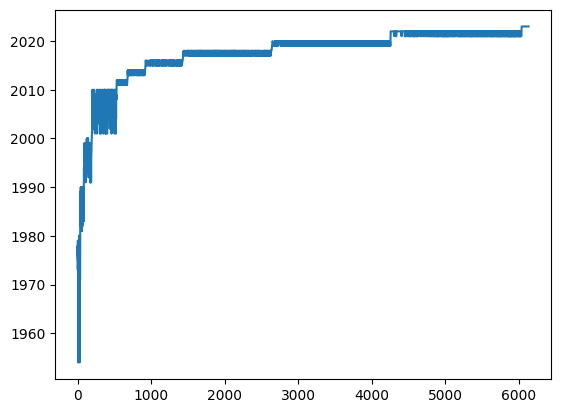

In [61]:
import matplotlib.pyplot as plt

df_peliculas.release_year.plot()

<Axes: xlabel='release_year', ylabel='review'>

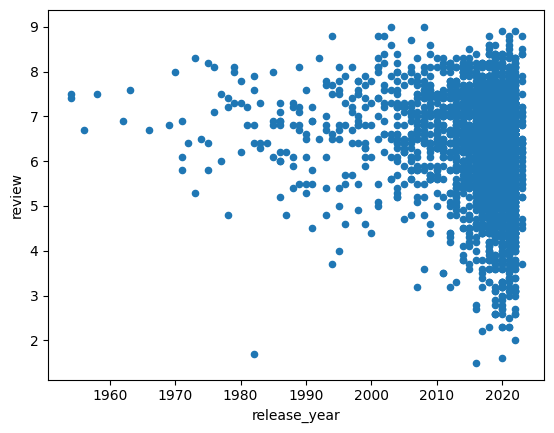

In [62]:
df_peliculas.plot.scatter(x='release_year', y='review')

Ahora sí, ¿cuántas películas por año tenemos?

<Axes: xlabel='release_year'>

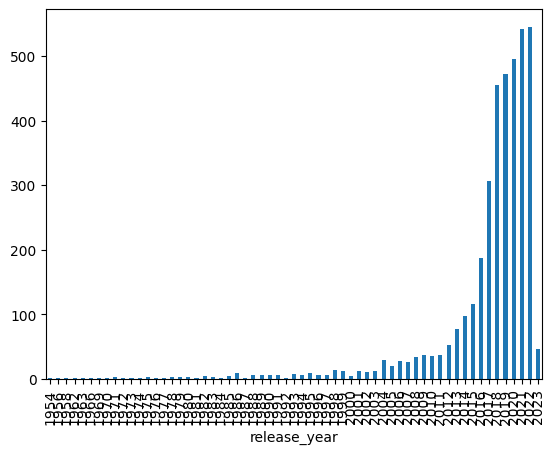

In [63]:
df_peliculas.groupby('release_year').id.nunique().plot.bar()


Hipótesis: Se están haciendo cada vez mejores películas (al menos según lo que está publicado en Netflix).

<Axes: xlabel='release_year'>

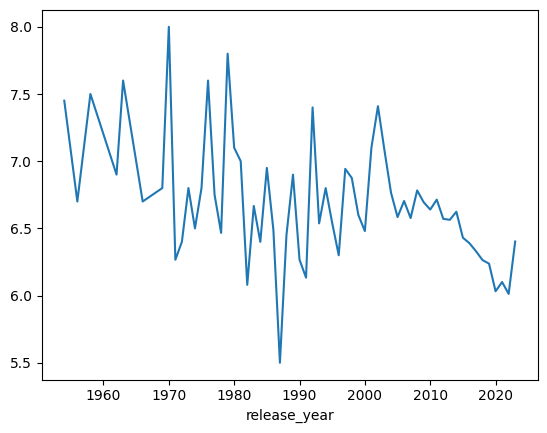

In [64]:
df_peliculas.groupby('release_year').review.mean().plot()

Pasemos ahora a practicar